# Libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.
/Users/jean-micheltaverne/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jean-micheltaverne/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jean-micheltaverne/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jean-miche

# Define basic parameters

In [34]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples =400 
nb_validation_samples = 100
epochs = 20
batch_size = 16
img_width = 244
img_height = 244

# Prepare Data

### Checking format of images

In [5]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

### Using DataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  
train_generator = train_datagen.flow_from_directory( train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary') 
  
validation_generator = test_datagen.flow_from_directory( validation_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary') 

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [32]:
label_map = (train_generator.class_indices)
label_map

{'cars': 0, 'planes': 1}

# Building our Neural Network from Scratch

In [6]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

In [7]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

In [35]:
model.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
25/25 [==============================] - 24s 965ms/step - loss: 0.2941 - acc: 0.8975 - val_loss: 0.2668 - val_acc: 0.8646
Epoch 2/20
25/25 [==============================] - 23s 906ms/step - loss: 0.2544 - acc: 0.8875 - val_loss: 0.2761 - val_acc: 0.8929
Epoch 3/20
25/25 [==============================] - 22s 883ms/step - loss: 0.2428 - acc: 0.9150 - val_loss: 0.1706 - val_acc: 0.9524
Epoch 4/20
25/25 [==============================] - 21s 850ms/step - loss: 0.2535 - acc: 0.9050 - val_loss: 0.2549 - val_acc: 0.8810
Epoch 5/20
25/25 [==============================] - 21s 847ms/step - loss: 0.1917 - acc: 0.9200 - val_loss: 0.3139 - val_acc: 0.8929
Epoch 6/20
25/25 [==============================] - 21s 855ms/step - loss: 0.1865 - acc: 0.9325 - val_loss: 0.6145 - val_acc: 0.8095
Epoch 7/20
25/25 [==============================] - 21s 856ms/step - loss: 0.2055 - acc: 0.9175 - val_loss: 0.2458 - val_acc: 0.9048
Epoch 8/20
25/25 [==============================] - 21s 857ms/step - 

Class:  1  --> planes


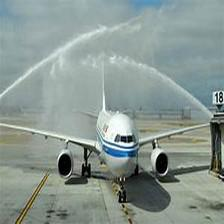

In [36]:
from keras.preprocessing import image
import numpy as np
from IPython.display import Image

# predicting images
filename = 'test1.jpg'

img = image.load_img(filename, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=batch_size)
current_class = classes[0][0]

for name, classes in label_map.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if classes == current_class:
        current_name = name

print('Class: ',current_class,' -->',current_name)

Image(filename=filename)


